# Predicting Car Prices

## Introduction

This is the fist project I've been developing during my learning path in dataquest for Data Scientist. In this course, we explored the fundamentals of machine learning using the k-nearest neighbors algorithm, and this is the first project where that's applied. The main idea here is to practice the machine learning workflow I've learned so far to predict a car's market price using its attributes.


## Dataset
The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

Let's start by taking a look at the dataset!


In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cars = pd.read_csv('imports-85.data')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
3              204 non-null int64
?              204 non-null object
alfa-romero    204 non-null object
gas            204 non-null object
std            204 non-null object
two            204 non-null object
convertible    204 non-null object
rwd            204 non-null object
front          204 non-null object
88.60          204 non-null float64
168.80         204 non-null float64
64.10          204 non-null float64
48.80          204 non-null float64
2548           204 non-null int64
dohc           204 non-null object
four           204 non-null object
130            204 non-null int64
mpfi           204 non-null object
3.47           204 non-null object
2.68           204 non-null object
9.00           204 non-null float64
111            204 non-null object
5000           204 non-null object
21             204 non-null int64
27             204 non-null int64
13495          204 n

We can see that the column names are not included, so we can add them manually while checking the documentation and re-read the data

In [3]:
column_names = [
    'symboling',
    'normalized-losses',
    'make',
    'fuel-type',
    'aspiration',
    'num-of-doors',
    'body-style',
    'drive-wheels',
    'engine-location',
    'wheel-base',
    'length',
    'width',
    'height',
    'curb-weight',
    'engine-type',
    'num-of-cylinders',
    'engine-size',
    'fuel-system',
    'bore',
    'stroke',
    'compression-ratio',
    'horsepower',
    'peak-rpm',
    'city-mpg',
    'highway-mpg',
    'price'
]
cars = pd.read_csv('imports-85.data', names=column_names)
cars.info()
cars.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


We can check the [documentation](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names) along with the data, to understand which columns are numeric and contain with continuous values, and then create a subset with them from the original dataset that will be used for predictions.

In [4]:
continuous_values_cols = [
    'normalized-losses',
    'wheel-base',
    'length',
    'width',
    'height',
    'curb-weight',
    'engine-size',
    'bore',
    'stroke',
    'compression-ratio',
    'horsepower',
    'peak-rpm',
    'city-mpg',
    'highway-mpg',
    'price'
]
numeric_cars = cars[continuous_values_cols]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


As we learned in this course, we usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the __normalized-losses__ column contains missing values represented using _"?"_. Let's replace these values and look for the presence of missing values in other numeric columns. Let's also rescale the values in the numeric columns so they all range from 0 to 1.

In [5]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Due to the fact that we want to actually predict the price, having nulls is a problem, so we can start by dropping those rows, and then we can decide what to do with the remaining.

In [6]:
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

One possible approach is to keep on dropping null values, but we can replace them with a mean as well, to keep the records:

In [7]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now it's time to normalize the numeric fields (except for price, of course) in order to avoid biasing our model

In [8]:
price_col_copy = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col_copy

## Hands on the model
### Univariate Model

Now we have cleaner data to feed the model, we can go ahead and create a  function to encapsulate training and a simple validation process. This function will have 3 parameters: training column name, target column name, and the dataframe object to work with.

In [9]:
def knn_train_test(train_col_name, target_col_name, df):
    knn = KNeighborsRegressor()

    # To check results with Dataquest provided solution
    np.random.seed(1)
        
    # Randomize order of rows
    shuffl_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffl_index)

    # Get 1/2 rounded value of total rows 
    n_row = int(len(random_df) / 2)
    
    # First half will be training set and the second one, test
    train_df = random_df.iloc[0:n_row]
    test_df = random_df.iloc[n_row:]
    
    # Fit KNN model
    knn.fit(train_df[[train_col_name]], train_df[target_col_name])
    
    # Predict with trained model
    predicted = knn.predict(test_df[[train_col_name]])

    # RMSE
    mse = mean_squared_error(test_df[target_col_name], predicted)
    rmse = np.sqrt(mse)
    return rmse

Let's test this function a bit!

In [10]:
rmse = {}
to_train = numeric_cars.columns.drop('price')

for column in to_train:
    rmse_value = knn_train_test(column, 'price', numeric_cars)
    rmse[column] = rmse_value

rmse

{'bore': 6780.627784685976,
 'city-mpg': 4766.422505090134,
 'compression-ratio': 6610.812153159129,
 'curb-weight': 4401.118254793124,
 'engine-size': 3238.4628296477176,
 'height': 8144.441042663747,
 'highway-mpg': 4630.026798588056,
 'horsepower': 4037.0377131537603,
 'length': 5427.2009608367125,
 'normalized-losses': 7330.197653434445,
 'peak-rpm': 7697.4596964334805,
 'stroke': 8006.529544647101,
 'wheel-base': 5461.553997873057,
 'width': 4704.482589704386}

From this simple test, we can verify that columns __engine-size__ and __horsepower__ were the best performers. Let's try varying the k value a bit to see how that affects results

In [11]:
def knn_train_test(train_col_name, target_col_name, df, k=5):
    knn = KNeighborsRegressor(n_neighbors=k)

    # To check results with Dataquest provided solution
    np.random.seed(1)
        
    # Randomize order of rows
    shuffl_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffl_index)

    # Get 1/2 rounded value of total rows 
    n_row = int(len(random_df) / 2)
    
    # First half will be training set and the second one, test
    train_df = random_df.iloc[0:n_row]
    test_df = random_df.iloc[n_row:]
    
    # Fit KNN model
    knn.fit(train_df[[train_col_name]], train_df[target_col_name])
    
    # Predict with trained model
    predicted = knn.predict(test_df[[train_col_name]])

    # RMSE
    mse = mean_squared_error(test_df[target_col_name], predicted)
    rmse = np.sqrt(mse)
    return rmse

k_rmse = {}
to_train = numeric_cars.columns.drop('price')
k_values = [1, 3, 5, 7, 9]


for column in to_train:
    k_rmse_pair = {}
    for k in k_values:
        k_rmse_pair[k] = knn_train_test(column, 'price', numeric_cars, k)
        k_rmse[column] = k_rmse_pair

print(k_rmse)

{'width': {1: 4559.257297950061, 3: 4606.413692169901, 9: 4652.914172067787, 5: 4704.482589704386, 7: 4571.485046194653}, 'horsepower': {1: 4170.054848037801, 3: 4020.8492630885394, 9: 4515.135617419103, 5: 4037.0377131537603, 7: 4353.811860277134}, 'height': {1: 8904.04645636071, 3: 8277.609643045525, 9: 7811.03606291223, 5: 8144.441042663747, 7: 7679.598124393773}, 'compression-ratio': {1: 8087.205346523092, 3: 7375.063685578359, 9: 7024.485525463435, 5: 6610.812153159129, 7: 6732.801282941515}, 'bore': {1: 8602.58848450066, 3: 6984.239489480916, 9: 6866.808502038413, 5: 6780.627784685976, 7: 6878.097965921532}, 'normalized-losses': {1: 7846.750605148984, 3: 7500.5698123109905, 9: 7688.096096891432, 5: 7330.197653434445, 7: 7756.421586234123}, 'length': {1: 4628.45550121557, 3: 5129.8358210721635, 9: 5383.054514833446, 5: 5427.2009608367125, 7: 5313.427720847974}, 'wheel-base': {1: 4493.734068810494, 3: 5120.161506064513, 9: 5738.405685192312, 5: 5461.553997873057, 7: 5448.1070513823

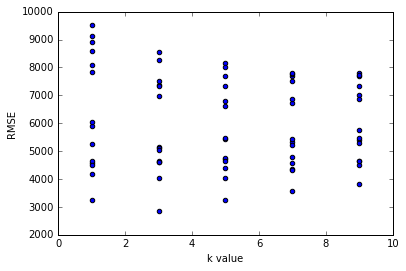

In [12]:
for k,v in k_rmse.items():
    x = list(v.keys())
    y = list(v.values())
    plt.scatter(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

### Multivariate

Now that we've checked several k values, we can check predictions with >1 column. We'll need to sort the results to rank the performance and test with top X features (2 to 5)

In [13]:
feature_avg_rmse = {}

for k,v in k_rmse.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse

series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-ratio    7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


In [16]:

def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results

{'2 best features': {5: 2949.8817277180374},
 '3 best features': {5: 3580.7376651928435},
 '4 best features': {5: 3487.340917327035},
 '5 best features': {5: 3410.2170133901805},
 '6 best features': {5: 3478.510890118539}}

### Hyperparameter focus

Now we can combine both and predict with multi column and different k values

In [18]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579},
 '3 best features': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.216494947217,
  15: 4388.22571

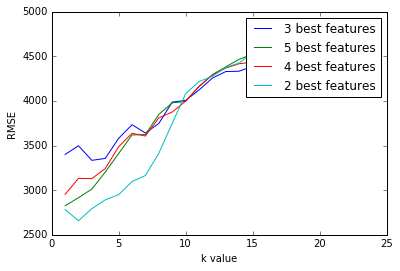

In [19]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()